##A3: Unsupervised learning with AHC

Dataset: A3-data.txt

AHC: Hierarchical Clustering  Algorithm(AHC): Clustering is a specific discipline within Machine Learning with the goal of dividing your data into homogeneous groups with common characteristics. This is a highly valued field, especially in marketing, where the aim is often to segment customer databases to identify specific behaviors.

# Import modules

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# Loading dataset

In [3]:
# Load training data
filename = 'A3-data.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

features = ['x', 'y', 'z', 't']
target = ['class']

# Separating out the features
X = df.loc[:, features].values

            x         y         z         t  class
0   -0.031676 -9.912054 -0.579436 -1.044239      1
1    0.002526  6.172456  3.288339 -1.006427      5
2    0.183123 -0.387841  6.236470 -1.691491      2
3   -0.042262 -1.996272 -1.655302 -2.995311      1
4   -0.062811 -0.417072  6.657475 -3.633134      4
..        ...       ...       ...       ...    ...
355 -0.340733  8.504536  7.903644 -2.032197      6
356 -0.024928  1.551977  6.361992 -0.757714      2
357 -0.668529 -0.607597  0.639295  4.329213      6
358 -0.122711 -5.516957 -2.111173  2.209675      3
359  0.740207 -7.492176  1.959426 -7.119918      6

[360 rows x 5 columns]



# Plot dendogram function

In [4]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

## Agglomerative Clustering
Agglomerative clustering is a hierarchical clustering technique used in machine learning and data analysis. The primary goal of agglomerative clustering is to build a hierarchy of clusters, often represented as a tree-like structure known as a dendrogram. This method starts with each data point as an individual cluster and then merges the closest pairs of clusters until only one cluster remains.

https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

AgglomerativeClustering can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

'average' uses the average of the distances of each observation from the two sets.
We set distance_threshold=0 to ensure that we compute the entire tree.

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


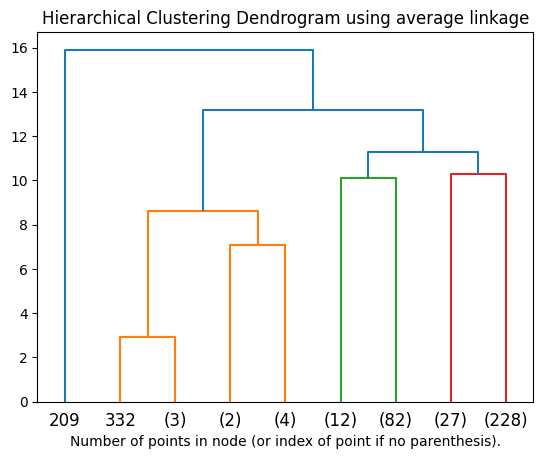

In [5]:
model = AgglomerativeClustering(affinity='euclidean', linkage='average', distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram using average linkage")

plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

'complete' uses the maximum distances between all observations in the two sets.

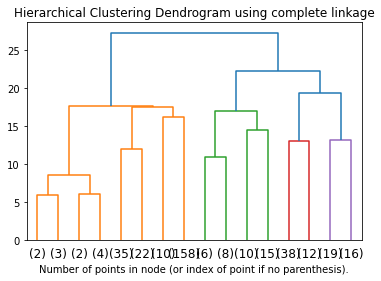

In [ ]:
model = AgglomerativeClustering(affinity='euclidean', linkage='complete', distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram using complete linkage")

plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()